<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Weight-Vector" data-toc-modified-id="Weight-Vector-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Weight Vector</a></span><ul class="toc-item"><li><span><a href="#Basic-Vector-Operations" data-toc-modified-id="Basic-Vector-Operations-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Basic Vector Operations</a></span></li><li><span><a href="#Calclulating-a-common-weight-vector" data-toc-modified-id="Calclulating-a-common-weight-vector-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Calclulating a common weight vector</a></span></li><li><span><a href="#Maximimum-Number-of-Iterations" data-toc-modified-id="Maximimum-Number-of-Iterations-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Maximimum Number of Iterations</a></span></li><li><span><a href="#Plotting-Weight-Iterations" data-toc-modified-id="Plotting-Weight-Iterations-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Plotting Weight Iterations</a></span></li></ul></li><li><span><a href="#The-Perceptron" data-toc-modified-id="The-Perceptron-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The Perceptron</a></span><ul class="toc-item"><li><span><a href="#Activation-Functions" data-toc-modified-id="Activation-Functions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Activation Functions</a></span></li><li><span><a href="#Perceptron-Implementation" data-toc-modified-id="Perceptron-Implementation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Perceptron Implementation</a></span></li><li><span><a href="#Approximation-of-Boolean-Operators" data-toc-modified-id="Approximation-of-Boolean-Operators-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Approximation of Boolean Operators</a></span></li></ul></li><li><span><a href="#The-Delta-Rule" data-toc-modified-id="The-Delta-Rule-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The Delta Rule</a></span><ul class="toc-item"><li><span><a href="#Delta-Rule-Implementation" data-toc-modified-id="Delta-Rule-Implementation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Delta Rule Implementation</a></span></li><li><span><a href="#Approximation-of-Boolean-Operators" data-toc-modified-id="Approximation-of-Boolean-Operators-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Approximation of Boolean Operators</a></span></li></ul></li></ul></div>

### Weight Vector

#### Basic Vector Operations

In [2]:
# %load vector.py
import math


def neg(v):
    return tuple(-x for x in v)


def norm(v):
    return math.sqrt(dotprod(v, v))


def normed(v):
    n = norm(v)
    return tuple(x / n for x in v)


def add(v, w):
    return tuple(x + y for x, y in zip(v, w))


def dotprod(v, w):
    return sum(x * y for x, y in zip(v, w))


def angle(v, w):
    return math.acos(dotprod(v, w) / (norm(v) * norm(w)))


#### Calclulating a common weight vector

In [3]:
# %load weight.py
from vector import add, dotprod


def weight(x, y):
    w = add(x, y)
    while True:
        if dotprod(w, x) <= 0:
            w = add(w, x)
        elif dotprod(w, y) <= 0:
            w = add(w, y)
        else:
            return w


In [4]:
def run_weight(x, y):

    def deg(x, y, digits=2):
        return round(math.degrees(angle(x, y)), 2)

    print(f"x = {x}	y = {y}	∡ xy = {deg(x, y)}°")
    print("")
    i, w = 0, add(x, y)
    while True:
        a, b = dotprod(w, x), dotprod(w, y)
        print(f"w{i} = {w}	∡ wx = {deg(w, x)}°	∡ wy = {deg(w, y)}°")
        if a < 0:
            w = add(w, x)
        elif b < 0:
            w = add(w, y)
        else:
            break
        i = i + 1
    print("")
    print(f"w = {normed(w)}")


In [5]:
x, y = (4, -6), (-10, 5)
run_weight(x, y)

x = (4, -6)	y = (-10, 5)	∡ xy = 150.26°

w0 = (-6, -1)	∡ wx = 114.23°	∡ wy = 36.03°
w1 = (-2, -7)	∡ wx = 49.64°	∡ wy = 100.62°
w2 = (-12, -2)	∡ wx = 114.23°	∡ wy = 36.03°
w3 = (-8, -8)	∡ wx = 78.69°	∡ wy = 71.57°

w = (-0.7071067811865475, -0.7071067811865475)


In [6]:
x, y = (-1, 1), (6, 1)
run_weight(x, y)

x = (-1, 1)	y = (6, 1)	∡ xy = 125.54°

w0 = (5, 2)	∡ wx = 113.2°	∡ wy = 12.34°
w1 = (4, 3)	∡ wx = 98.13°	∡ wy = 27.41°
w2 = (3, 4)	∡ wx = 81.87°	∡ wy = 43.67°

w = (0.6, 0.8)


In [7]:
x, y = (4, -7), (-3, 5)  # requires 80 iterations
x, y = (-1, -10), (4, 8)
run_weight(x, y)

x = (-1, -10)	y = (4, 8)	∡ xy = 159.15°

w0 = (3, -2)	∡ wx = 62.02°	∡ wy = 97.13°
w1 = (7, 6)	∡ wx = 136.31°	∡ wy = 22.83°
w2 = (6, -4)	∡ wx = 62.02°	∡ wy = 97.13°
w3 = (10, 4)	∡ wx = 117.51°	∡ wy = 41.63°
w4 = (9, -6)	∡ wx = 62.02°	∡ wy = 97.13°
w5 = (13, 2)	∡ wx = 104.46°	∡ wy = 54.69°
w6 = (12, -8)	∡ wx = 62.02°	∡ wy = 97.13°
w7 = (16, 0)	∡ wx = 95.71°	∡ wy = 63.43°
w8 = (15, -10)	∡ wx = 62.02°	∡ wy = 97.13°
w9 = (19, -2)	∡ wx = 89.7°	∡ wy = 69.44°

w = (0.9945054529214061, -0.10468478451804275)


In [8]:
from random import random, randint

n = 10
x, y = (randint(-n, n), randint(-n, n)), (randint(-n, n), randint(-n, n))
run_weight(x, y)


x = (4, 7)	y = (10, 5)	∡ xy = 33.69°

w0 = (14, 12)	∡ wx = 19.65°	∡ wy = 14.04°

w = (0.7592566023652966, 0.6507913734559685)


#### Maximimum Number of Iterations

In [9]:
import itertools


def count_weight_iterations(x, y):
    n, w = 0, add(x, y)
    while True:
        a, b = dotprod(w, x), dotprod(w, y)
        if a < 0:
            w = add(w, x)
        elif b < 0:
            w = add(w, y)
        else:
            return n
        n = n + 1

        
def deg(x, y, digits=2):
    return round(math.degrees(angle(x, y)), ndigits=digits)


for n in range(3, 10):
    N = range(-n + 1 , n)
    M = list(itertools.product(N, N))
    R = list(itertools.product(M, M))
    k, x, y = max([(count_weight_iterations(x, y), x, y) for x, y in R])
    print(f"n = {n} ({len(R)} combinations):	max iterations = {k}	x = {x}	y = {y}	∡ xy = {deg(x, y)}°")


n = 3 (625 combinations):	max iterations = 5	x = (2, 2)	y = (-1, -2)	∡ xy = 161.57°
n = 4 (2401 combinations):	max iterations = 11	x = (3, 2)	y = (-2, -1)	∡ xy = 172.87°
n = 5 (6561 combinations):	max iterations = 29	x = (4, 3)	y = (-3, -2)	∡ xy = 176.82°
n = 6 (14641 combinations):	max iterations = 55	x = (5, 4)	y = (-4, -3)	∡ xy = 178.21°
n = 7 (28561 combinations):	max iterations = 89	x = (6, 5)	y = (-5, -4)	∡ xy = 178.85°
n = 8 (50625 combinations):	max iterations = 131	x = (7, 6)	y = (-6, -5)	∡ xy = 179.2°
n = 9 (83521 combinations):	max iterations = 181	x = (8, 7)	y = (-7, -6)	∡ xy = 179.42°


#### Plotting Weight Iterations

In [10]:
import matplotlib.pyplot as plot


def plot_weight_iterations(x, y, size=(7, 7), t=2.75):
    fig = plot.figure()
    fig.set_size_inches(*size)    
    ax = plot.axes()
    ax.set_aspect('equal')

    ax.arrow(0.0, 0.0, x[0], x[1], head_width=0.1, head_length=0.3, fc='lightblue', ec='black')
    ax.arrow(0.0, 0.0, y[0], y[1], head_width=0.1, head_length=0.3, fc='lightblue', ec='black')
    ax.annotate('u', xy=x, xytext=(x[0] + 0.1, x[1] - 0.1))
    ax.annotate('v', xy=y, xytext=(y[0] + 0.1, y[1] - 0.1))

    n, w = 1, add(x, y)
    while True:
        ax.arrow(0.0, 0.0, w[0], w[1], head_width=0.05, head_length=0.2)
        ax.annotate(n, xy=w, xytext=(w[0] + 0.05, w[1] + 0.05))
        a, b = dotprod(w, x), dotprod(w, y)
        if a < 0:
            w = add(w, x)
        elif b < 0:
            w = add(w, y)
        else:
            break
        n = n + 1

    ax.arrow(0.0, 0.0, w[0], w[1], width=0.01, head_width=0.1, head_length=0.3, fc='red', ec='red')
#     ax.annotate('w', xy=w, xytext=(w[0] + 0.05, w[1] + 0.05))
    
    plot.grid()
    plot.xlim(-t, t)
    plot.ylim(-t, t)

    plot.title(f"Weight vector calulated after {n} Iterations")
    plot.show()
    

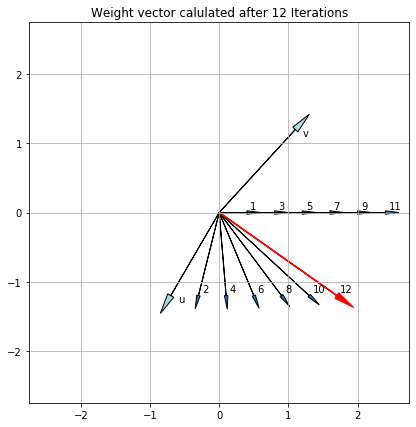

In [11]:
x, y = (-0.5, -1.2), (1.1, 1.2)
x, y = (-0.7, -1.2), (1.1, 1.2)
plot_weight_iterations(x, y)

### The Perceptron

#### Activation Functions

In [12]:
# %load activation_function.py
"""Numerically stable version of sigmoid::

    def sigmoid(x):
        if x >= 0:
            return 1.0 / (1.0 + math.exp(-x))
        y = math.exp(x)
        return y / (1 + y)

"""

import math


def heaviside(x):
    return 0 if x < 0.0 else 1


def linear(x, a=1.0):
    return a * x


def dx_linear(_, a=1.0):
    return a


def sigmoid(x):
    return 1.0 / (1.0 + math.exp(-x))


def dx_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))


#### Perceptron Implementation

In [13]:
# %load perceptron.py
from vector import dotprod


def perceptron(T, t=0.01, epochs=50):
    n = len(T[0])
    w, b = n * (0.0,), 0.0
    for _ in range(epochs):
        done = True
        for x, y in T:
            if dotprod(w, x) + b >= 0:
                z = 1
            else:
                z = 0
            w = tuple(w[i] - t * (z - y) * x[i] for i in range(n))
            b = b - t * (z - y)
            if not y == z:
                done = False
        if done:
            break
    return w, b


In [14]:
def run_perceptron(f, T, t=0.01, epochs=50):
    w, b = perceptron(T, t=t, epochs=epochs)
    p = lambda x: heaviside(dotprod(w, x) + b)
    if all(p(x) == y for x, y in T):
        print(f"{f.__name__}: ok")
    else:
        print(f"{f.__name__}: failed")    
    for x, y in T:
        if p(x) == y:
            print(f"    {f.__name__}{x} = {y}")
        else:
            print(f"    {f.__name__}{x} = {y} <> {p(x)}")


#### Approximation of Boolean Operators

In [15]:
# %load boolean.py

def AND(x, y):
    return int(x and y)


def OR(x, y):
    return int(x or y)


def NAND(x, y):
    return int(not x and not y)


def XOR(x, y):
    return int(x and not y or not x and y)


BOOLEAN_OPERATORS = AND, OR, NAND, XOR
BOOLEAN_OPERATOR_DOMAIN = (0, 0), (0, 1), (1, 0), (1, 1)
BOOLEAN_TESTDATA = [(f, [(x, f(*x)) for x in BOOLEAN_OPERATOR_DOMAIN]) for f in BOOLEAN_OPERATORS]


In [16]:
t, epochs = 0.01, 50
for f, T in BOOLEAN_TESTDATA:
    run_perceptron(f, T, t=t, epochs=epochs)
    

AND: ok
    AND(0, 0) = 0
    AND(0, 1) = 0
    AND(1, 0) = 0
    AND(1, 1) = 1
OR: ok
    OR(0, 0) = 0
    OR(0, 1) = 1
    OR(1, 0) = 1
    OR(1, 1) = 1
NAND: ok
    NAND(0, 0) = 1
    NAND(0, 1) = 0
    NAND(1, 0) = 0
    NAND(1, 1) = 0
XOR: failed
    XOR(0, 0) = 0 <> 1
    XOR(0, 1) = 1
    XOR(1, 0) = 1 <> 0
    XOR(1, 1) = 0


### The Delta Rule

   #### Delta Rule Implementation

In [17]:
# %load delta_rule.py
from random import random
from vector import dotprod


def delta_rule(T, a, da, t=0.01, eps=0.05, epochs=50):
    n = len(T[0])
    w, b = n * (random(),), random()
    for _ in range(epochs):
        err = 0.0
        for x, y in T:
            z = dotprod(w, x) + b
            az, daz = a(z), da(z)
            d = y - az
            w = tuple(w[i] + t * d * daz * x[i] for i in range(n))
            b = b + t * d * daz
            err = err + d * d
        if 0.5 * err < eps:
            break
    return w, b


In [18]:
def delta_rule_approx(T, a, da, fire, t=0.01, eps=0.05, epochs=50):
    w, b = delta_rule(T, a=a, da=da, t=t, eps=eps, epochs=epochs)
    return lambda x: fire(dotprod(w, x) + b)


def run_delta_rule(f, T, a, da, fire, t=0.01, eps=0.05, epochs=50):
    p = delta_rule_approx(T, a, da, fire, t=t, eps=eps, epochs=epochs)
    if all(p(x) == y for x, y in T):
        print(f"{f.__name__}: ok")
    else:
        print(f"{f.__name__}: failed")
    for x, y in T:
        z = p(x)
        if z == y:
            print(f"    {f.__name__}{x} = {y}")
        else:
            print(f"    {f.__name__}{x} = {y} ≠ {z}")


#### Approximation of Boolean Operators

In [19]:
t, eps, epochs = 0.01, 0.05, 5000
for f, T in BOOLEAN_TESTDATA:
    run_delta_rule(f, T, a=sigmoid, da=dx_sigmoid, fire=heaviside, t=t, eps=eps, epochs=epochs)


AND: ok
    AND(0, 0) = 0
    AND(0, 1) = 0
    AND(1, 0) = 0
    AND(1, 1) = 1
OR: ok
    OR(0, 0) = 0
    OR(0, 1) = 1
    OR(1, 0) = 1
    OR(1, 1) = 1
NAND: ok
    NAND(0, 0) = 1
    NAND(0, 1) = 0
    NAND(1, 0) = 0
    NAND(1, 1) = 0
XOR: failed
    XOR(0, 0) = 0 ≠ 1
    XOR(0, 1) = 1
    XOR(1, 0) = 1
    XOR(1, 1) = 0


In [23]:
def athird(x, s=0.3):
    if abs(x) <= s:
        return 0
    elif abs(1 - x) < s:
        return 1
    return x


def athird(x, s=0.3):
    return int(x >= s)


def limited_linear(x):
    if x > 1:
        return 1
    elif x < -1:
        return -1
    return x

fire = limited_linear
fire = heaviside
fire = athird


t, eps, epochs = 0.01, 0.05, 500
for f, T in BOOLEAN_TESTDATA:
    a = lambda x: linear(x, a=s)
    da = lambda x: dx_linear(x, a=s)
    run_delta_rule(f, T, a=linear, da=dx_linear, fire=fire, t=t, eps=eps, epochs=epochs)


AND: ok
    AND(0, 0) = 0
    AND(0, 1) = 0
    AND(1, 0) = 0
    AND(1, 1) = 1
OR: ok
    OR(0, 0) = 0
    OR(0, 1) = 1
    OR(1, 0) = 1
    OR(1, 1) = 1
NAND: ok
    NAND(0, 0) = 1
    NAND(0, 1) = 0
    NAND(1, 0) = 0
    NAND(1, 1) = 0
XOR: failed
    XOR(0, 0) = 0 ≠ 1
    XOR(0, 1) = 1
    XOR(1, 0) = 1
    XOR(1, 1) = 0 ≠ 1


In [21]:
t, eps, epochs = 0.01, 0.05, 5000
for s in [0.5, 1.0, 2.0, 5.0]:
    print(f"s = {s}")
    for f, T in BOOLEAN_TESTDATA:
        a = lambda x: linear(x, a=s)
        da = lambda x: dx_linear(x, a=s)
        p = delta_rule_approx(T, a, da, fire=lambda r: athird(r / s), t=t, eps=eps, epochs=epochs)
        if all(p(x) == y for x, y in T):
            print(f"    {f.__name__}: ok")
        else:
            print(f"    {f.__name__}: failed")


s = 0.5
    AND: failed
    OR: failed
    NAND: failed
    XOR: failed
s = 1.0
    AND: ok
    OR: ok
    NAND: ok
    XOR: failed
s = 2.0
    AND: failed
    OR: failed
    NAND: failed
    XOR: failed
s = 5.0
    AND: failed
    OR: failed
    NAND: failed
    XOR: failed


In [22]:
tanh = math.tanh
def dx_tanh(x):
    return 1 - tanh(x) ** 2


t, eps, epochs = 0.01, 0.05, 500
for f, T in BOOLEAN_TESTDATA:
    run_delta_rule(f, T, a=tanh, da=dx_tanh, fire=athird, t=t, eps=eps, epochs=epochs)


AND: ok
    AND(0, 0) = 0
    AND(0, 1) = 0
    AND(1, 0) = 0
    AND(1, 1) = 1
OR: failed
    OR(0, 0) = 0
    OR(0, 1) = 1
    OR(1, 0) = 1
    OR(1, 1) = 1 ≠ 1.7429697121457917
NAND: failed
    NAND(0, 0) = 1 ≠ 0.6681973866885323
    NAND(0, 1) = 0
    NAND(1, 0) = 0
    NAND(1, 1) = 0
XOR: failed
    XOR(0, 0) = 0
    XOR(0, 1) = 1 ≠ 0.6465243354613168
    XOR(1, 0) = 1 ≠ 0.6438226118167514
    XOR(1, 1) = 0 ≠ 1
